In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

import warnings
warnings.filterwarnings("ignore")

# from yellowbrick.classifier import ClassPredictionError
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, roc_curve, auc, f1_score, accuracy_score, confusion_matrix, recall_score, precision_score

In [2]:
df = pd.read_csv('p2_dataset.csv')[['text', 'label']]
print(df.shape)
df = df.drop_duplicates()
df

(2131, 2)


,text,label
0,latest headlin cnn busi great shutdown newsroo...,0
4,china want take victori lap handl coronaviru o...,0
5,coronaviru disinform creat challeng china gove...,0
6,china coronaviru eat wild anim made illeg end ...,0
7,china economi could shrink first time decad co...,0
...,...,...
2126,mani countri around world success contain coro...,1
2127,need flatten curv coronaviru pandem encourag p...,1
2128,mysteri miss bu rider began bu driver small to...,1
2129,agn desert exemplar modernist literatur novel ...,1


In [3]:
df_emb = pd.read_csv('../open_ai_p3_embeddings.csv')
df_emb

,text,class,ada_embedding
0,latest headlin cnn busi tl dr u govern expect ...,ctrl,"[-0.0244539026170969, -0.015060365200042725, 0..."
1,china want take victori lap handl coronaviru o...,ctrl,"[0.0019263223512098193, -0.003812055103480816,..."
2,coronaviru disinform creat challeng china gove...,ctrl,"[-0.004948284476995468, 0.002945489715784788, ..."
3,china coronaviru eat wild anim made illeg end ...,ctrl,"[0.005060594528913498, -0.01757677085697651, 0..."
4,china economi could shrink first time decad co...,ctrl,"[0.0027951218653470278, -0.009340660646557808,..."
...,...,...,...
11853,today world concern authoritarian racism natio...,instruct_gpt,"[-0.004592906218022108, -0.01598070189356804, ..."
11854,keep space station clean astronaut must practi...,instruct_gpt,"[0.02663489431142807, 0.0020218866411596537, 0..."
11855,citi requir tenant pay first month rent someti...,instruct_gpt,"[-0.007772138807922602, 0.010608934797346592, ..."
11856,it’ easi brows customis app get news way keep ...,instruct_gpt,"[-0.02405986562371254, 0.02182905748486519, 0...."


In [4]:
open_ai_embeddings = []
for text in df['text']:
    embedding = df_emb[df_emb['text'] == text]['ada_embedding']

    if len(embedding) == 1:
        open_ai_embeddings.append(embedding.item())
    else:
        open_ai_embeddings.append(embedding.iloc[0])

df['ada_embedding'] = open_ai_embeddings
df

,text,label,ada_embedding
0,latest headlin cnn busi great shutdown newsroo...,0,"[-0.025294136255979538, -0.003723168047145009,..."
4,china want take victori lap handl coronaviru o...,0,"[-0.0001183393833343871, -0.002702487399801612..."
5,coronaviru disinform creat challeng china gove...,0,"[-0.006458402145653963, 0.008644788525998592, ..."
6,china coronaviru eat wild anim made illeg end ...,0,"[0.012619474902749062, -0.019594628363847733, ..."
7,china economi could shrink first time decad co...,0,"[-0.012929419055581093, -0.020438117906451225,..."
...,...,...,...
2126,mani countri around world success contain coro...,1,"[0.0026109819300472736, 0.0033029087353497744,..."
2127,need flatten curv coronaviru pandem encourag p...,1,"[-0.022579839453101158, 0.0040325988084077835,..."
2128,mysteri miss bu rider began bu driver small to...,1,"[0.017492173239588737, -0.007786484435200691, ..."
2129,agn desert exemplar modernist literatur novel ...,1,"[-0.0016832428518682718, -0.004846202209591865..."


In [5]:
def convert_to_list(emb):
    return eval(emb)

df['ada_embedding'] = df['ada_embedding'].apply(convert_to_list)
df

,text,label,ada_embedding
0,latest headlin cnn busi great shutdown newsroo...,0,"[-0.025294136255979538, -0.003723168047145009,..."
4,china want take victori lap handl coronaviru o...,0,"[-0.0001183393833343871, -0.002702487399801612..."
5,coronaviru disinform creat challeng china gove...,0,"[-0.006458402145653963, 0.008644788525998592, ..."
6,china coronaviru eat wild anim made illeg end ...,0,"[0.012619474902749062, -0.019594628363847733, ..."
7,china economi could shrink first time decad co...,0,"[-0.012929419055581093, -0.020438117906451225,..."
...,...,...,...
2126,mani countri around world success contain coro...,1,"[0.0026109819300472736, 0.0033029087353497744,..."
2127,need flatten curv coronaviru pandem encourag p...,1,"[-0.022579839453101158, 0.0040325988084077835,..."
2128,mysteri miss bu rider began bu driver small to...,1,"[0.017492173239588737, -0.007786484435200691, ..."
2129,agn desert exemplar modernist literatur novel ...,1,"[-0.0016832428518682718, -0.004846202209591865..."


In [6]:
for idx, doc in df.iterrows():
    if len(doc['ada_embedding']) == 0:
        print(idx)

148
792


In [7]:
df = df.drop([148,792])

for idx, doc in df.iterrows():
    if len(doc['ada_embedding']) == 0:
        print(idx)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2052 entries, 0 to 2130
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           2052 non-null   object
 1   label          2052 non-null   int64 
 2   ada_embedding  2052 non-null   object
dtypes: int64(1), object(2)
memory usage: 64.1+ KB


### Splitting the data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df['ada_embedding'],
                                                    df['label'],
                                                    stratify = df['label'],
                                                    test_size = 0.2,
                                                    random_state = 1234)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1641,) (411,) (1641,) (411,)


In [10]:
y_train.value_counts()

1    851
0    790
Name: label, dtype: int64

In [11]:
X_train = pd.DataFrame(X_train.tolist())
X_test = pd.DataFrame(X_test.tolist())
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1641, 1536) (411, 1536) (1641,) (411,)


In [12]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535
0,-0.013951,-0.002757,0.004617,-0.020529,0.013385,0.013142,-0.008964,-0.009496,-0.007798,-0.007272,...,0.006901,-0.020987,0.018197,-0.044994,-0.030059,0.009948,-0.026298,-0.001613,0.000215,-0.013277
1,-0.017303,0.010824,0.013080,-0.021881,0.005730,0.004538,-0.007175,-0.035753,-0.026569,-0.008911,...,0.017057,-0.001485,0.020897,-0.030068,-0.010510,-0.010073,-0.015184,0.013107,0.012341,-0.056254
2,-0.005093,-0.000088,0.008339,-0.024482,0.013637,0.013370,-0.004508,-0.015951,-0.011762,-0.006110,...,0.014637,-0.002338,0.013514,-0.037873,-0.016787,0.012658,-0.015458,-0.000106,0.002807,-0.025865
3,-0.003954,-0.014592,0.017631,-0.016970,0.016140,0.019123,-0.012087,-0.029746,-0.013649,-0.016477,...,0.014718,0.002290,0.020459,-0.027129,-0.044634,-0.003996,-0.009301,0.003947,-0.004221,-0.027650
4,0.000703,-0.006269,0.006519,-0.035315,-0.017658,0.023451,-0.001684,-0.015713,-0.019589,-0.026313,...,0.018144,-0.014407,0.011969,-0.025521,-0.005654,0.005842,-0.021631,-0.006658,0.024354,-0.034982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1636,-0.009089,-0.016221,0.010994,-0.001210,0.027404,0.006162,-0.009609,-0.005855,-0.010278,0.008461,...,0.009062,-0.019665,0.033630,-0.037276,-0.034980,-0.003415,-0.004781,-0.006935,0.006172,-0.020421
1637,-0.010540,-0.008138,-0.006741,-0.037384,-0.002716,0.015979,0.002627,-0.010412,0.001906,0.003954,...,0.009319,-0.006158,0.018328,-0.027829,-0.034172,-0.012882,0.001672,0.004501,-0.001535,-0.021661
1638,0.005794,0.010676,0.024008,-0.051205,-0.016651,0.009524,-0.015179,-0.011425,-0.017822,-0.033628,...,0.022455,-0.004544,0.053522,-0.029377,-0.008577,-0.010199,-0.021174,0.000369,-0.004738,-0.031312
1639,-0.016180,-0.024237,-0.002101,-0.023358,-0.031295,0.010614,-0.018803,-0.020295,-0.032014,0.001384,...,0.013690,-0.035290,0.007877,-0.038646,-0.030656,0.039205,0.025276,-0.007184,-0.008576,-0.005626


### Model Training

In [28]:
# def visualizer(clf):
#     visualizer = ClassPredictionError(clf, classes= [0, 1])

#     # Fit the training data to the visualizer
#     visualizer.fit(X_train, y_train)

#     # Evaluate the model on the test data
#     visualizer.score(X_test, y_test)

#     # Draw visualization
#     visualizer.show()
    
def metrics(pred):
    classes = [0, 1]
    matrix = confusion_matrix(y_test, pred, labels = classes)
    mat = matrix.diagonal()/matrix.sum(axis=1)
    print(classification_report(y_test, pred, labels = classes,
                                digits=4))

    print('confusion matrix: ', mat)

    Accuracy = accuracy_score(y_test,pred)
    F1 = f1_score(y_test, pred, average='macro')
    print("Accuracy:", Accuracy)

    rec = recall_score(y_test, pred, average='macro')
    print('Recall: ', rec)
    prec = precision_score(y_test, pred, average='macro')
    print('Precision: ', prec)

    print('F1:', F1)
    
def get_predictions(tpr, fpr, threshold, ypred):
    #If tpr is hight & fpr is low : (tpr*(1-fpr)) is maximum
    actual_ypred = []

    thres = threshold[np.argmax(tpr * (1 - fpr))]
    for value in ypred:
        if value < thres:
            actual_ypred.append(0)
        else:
            actual_ypred.append(1)
    return actual_ypred
    
def get_roc_curve(model_name, classifier):
    
    Ypred_train = classifier.predict(X_train)
    fpr_train, tpr_train, threshold_train = roc_curve(y_train, Ypred_train)
    
    Ypred_test = classifier.predict(X_test)
    fpr_test, tpr_test, threshold_test = roc_curve(y_test, Ypred_test)

    auc_train = round(auc(fpr_train, tpr_train), 4)
    auc_test = round(auc(fpr_test, tpr_test), 4)

    plt.rcParams["figure.figsize"] = [5, 4]
    plt.plot(fpr_train, tpr_train, label = f'train AUC : {auc_train}')
    plt.plot(fpr_test, tpr_test, label = f'test AUC : {auc_test}')
    plt.legend()
    plt.grid()
    plt.title(f'{model_name} ROC Curve')
    plt.xlabel('parameter') 
    plt.ylabel('AUC')
    plt.show()

    roc_results = {
    'ypred_train' : Ypred_train,
    'ypred_test' : Ypred_test,
    'fpr_train' : fpr_train,
    'fpr_test' : fpr_test,
    'tpr_train' : tpr_train,
    'tpr_test' : tpr_test,
    'threshold_train' : threshold_train,
    'threshold_test' : threshold_test
    }
    return roc_results

def get_confusion_matrix(model_name, roc_results):
    actual_ypred_train = get_predictions(roc_results['tpr_train'],
                                         roc_results['fpr_train'],
                                         roc_results['threshold_train'],
                                         roc_results['ypred_train'])

    matrix_train = confusion_matrix(y_train, actual_ypred_train)

    actual_ypred_test = get_predictions(roc_results['tpr_test'],
                                        roc_results['fpr_test'],
                                        roc_results['threshold_test'],
                                        roc_results['ypred_test'])

    matrix_test = confusion_matrix(y_test, actual_ypred_test)

    plt.rcParams["figure.figsize"] = [12, 5]
    plt.rcParams["figure.autolayout"] = True
    f, axes = plt.subplots(1, 2)
    
    axes[0].title.set_text(f'{model_name} Training Confusion Matrix')
    sns.heatmap(matrix_train, annot = True, ax = axes[0], fmt = "d")


    sns.heatmap(matrix_test, annot = True, ax = axes[1], fmt = "d")
    axes[1].title.set_text(f'{model_name} Testing Confusion Matrix')

    return actual_ypred_test, actual_ypred_train

### Random Forest Classifier

In [20]:
randomforest_model = RandomForestClassifier()

parameters = { 'max_depth' : [10, 20, 30],
               'n_estimators' : [90, 150, 180],
               'max_samples' : [0.6, 0.8]
 }

cross_validation = 3
scoring_metric = "f1"
randomforest_model_cv = GridSearchCV(randomforest_model, 
                                     parameters,
                                     cv = cross_validation,
                                     scoring = scoring_metric,
                                     return_train_score=True)

randomforest_model_cv.fit(X_train, y_train)
print('Best Params ', randomforest_model_cv.best_params_)

Best Params  {'max_depth': 10, 'max_samples': 0.6, 'n_estimators': 180}


In [29]:
parameters = {
     'max_depth' : 10,
     'n_estimators' : 180,
     'max_samples' : 0.8
}
randomforest_model = RandomForestClassifier(max_depth = parameters['max_depth'],
                                            max_samples = parameters['max_samples'],
                                            n_estimators = parameters['n_estimators'])

randomforest_model.fit(X_train, y_train)
Ypredtest = randomforest_model.predict_proba(X_test)[:,1]

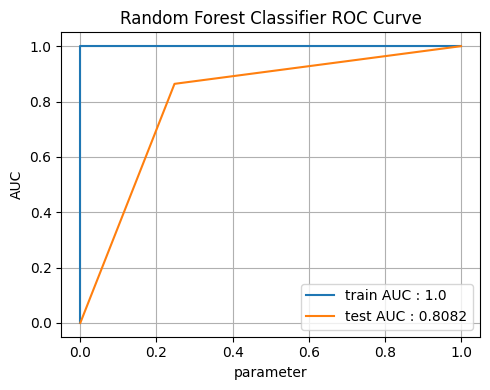

In [30]:
roc_results = get_roc_curve('Random Forest Classifier',
                             randomforest_model)

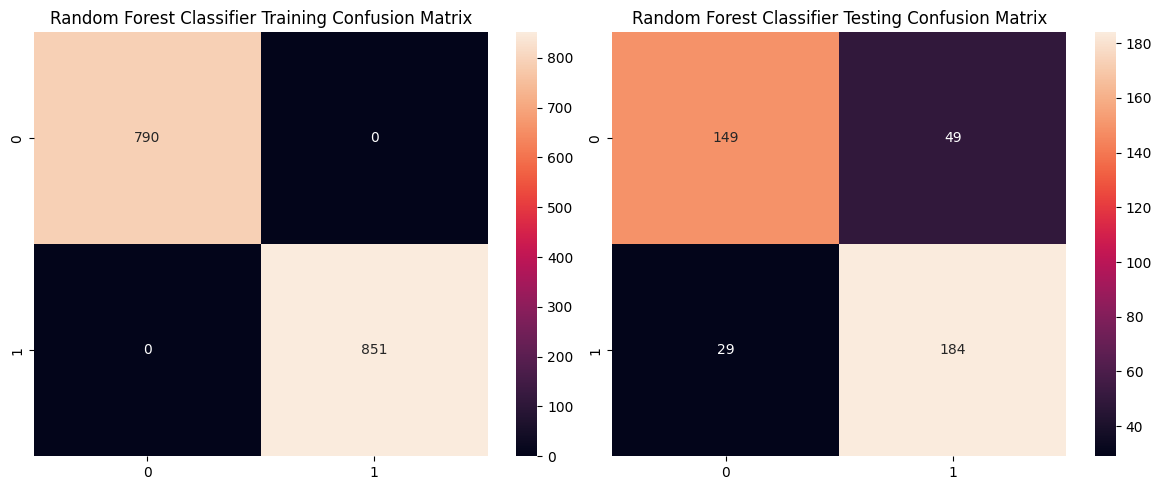

In [31]:
results = get_confusion_matrix('Random Forest Classifier',
                                roc_results)

In [32]:
metrics(results[0])

              precision    recall  f1-score   support

           0     0.8371    0.7525    0.7926       198
           1     0.7897    0.8638    0.8251       213

    accuracy                         0.8102       411
   macro avg     0.8134    0.8082    0.8088       411
weighted avg     0.8125    0.8102    0.8094       411

confusion matrix:  [0.75252525 0.86384977]
Accuracy: 0.8102189781021898
Recall:  0.8081875088917343
Precision:  0.8133891112504219
F1: 0.80883264955634


### Logistic Regression

In [45]:
logistic_model = LogisticRegression()
parameters = { 'C' : [0.01, 0.1, 1, 3, 10],
               'penalty' : ['l2', 'elasticnet']
             }

cross_validation = 3
scoring_metric = "f1"

logistic_model_cv = GridSearchCV(logistic_model,
                                 parameters,
                                 cv = cross_validation,
                                 scoring = scoring_metric,
                                 return_train_score=True)

logistic_model_cv.fit(X_train, y_train)
print('Best Params ', logistic_model_cv.best_params_)

Best Params  {'C': 10, 'penalty': 'l2'}


In [46]:
parameters = { 'C' : 10,
               'penalty' : 'l2'
 }

logistic_model = LogisticRegression(C = parameters['C'], penalty = parameters['penalty'])
logistic_model.fit(X_train, y_train)
Ypredtest = logistic_model.predict_proba(X_test)[:,1]

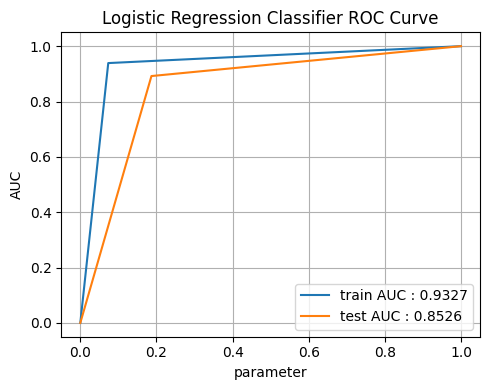

In [47]:
roc_results = get_roc_curve('Logistic Regression Classifier',
                             logistic_model)

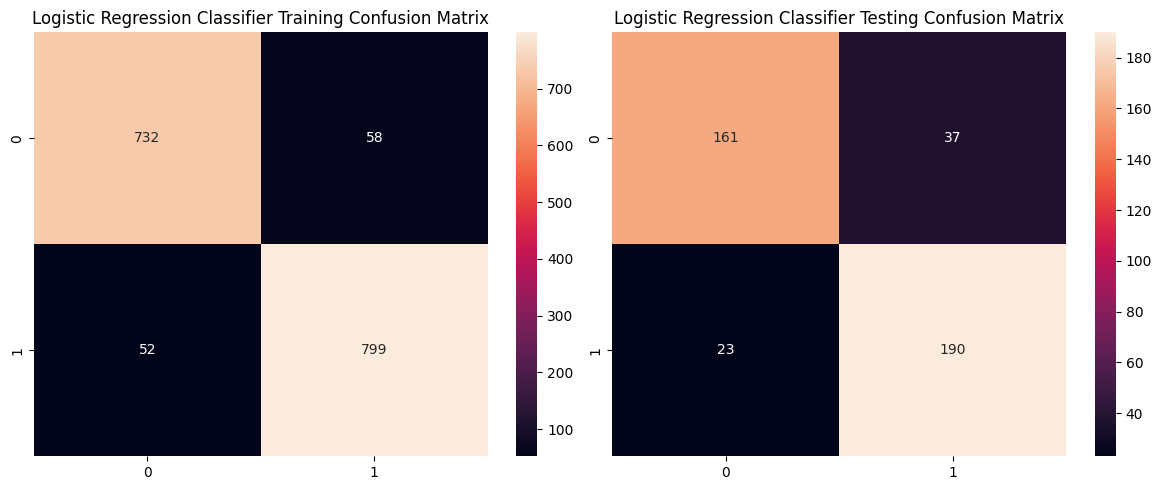

In [48]:
results = get_confusion_matrix('Logistic Regression Classifier',
                                roc_results)

In [49]:
metrics(results[0])

              precision    recall  f1-score   support

           0     0.8750    0.8131    0.8429       198
           1     0.8370    0.8920    0.8636       213

    accuracy                         0.8540       411
   macro avg     0.8560    0.8526    0.8533       411
weighted avg     0.8553    0.8540    0.8537       411

confusion matrix:  [0.81313131 0.89201878]
Accuracy: 0.8540145985401459
Recall:  0.8525750462370181
Precision:  0.8560022026431717
F1: 0.8532841504045693


### XG Boost

In [50]:
import xgboost

xgboost_model = xgboost.XGBClassifier()

parameters = { 'max_depth' : [10, 20, 30],
               'n_estimators' : [90, 150, 180],
               'min_child_weight' : [1, 5, 10 ]
 }

cross_validation = 3
scoring_metric = "f1"
xgboost_model_cv = GridSearchCV(xgboost_model, 
                                parameters,
                                cv = cross_validation,
                                scoring = scoring_metric,
                                return_train_score=True)

xgboost_model_cv.fit(X_train, y_train)
print('Best Params ', xgboost_model_cv.best_params_)

Best Params  {'max_depth': 20, 'min_child_weight': 5, 'n_estimators': 180}


In [51]:
parameters = { 'max_depth' : 20,
               'min_child_weight' : 5,
               'n_estimators' : 180
 }

xgboost_model = xgboost.XGBClassifier(max_depth = parameters['max_depth'],
                                      min_child_weight = parameters['min_child_weight'],
                                      n_estimators = parameters['n_estimators'])
xgboost_model.fit(X_train, y_train)
Ypredtest = xgboost_model.predict(X_test)

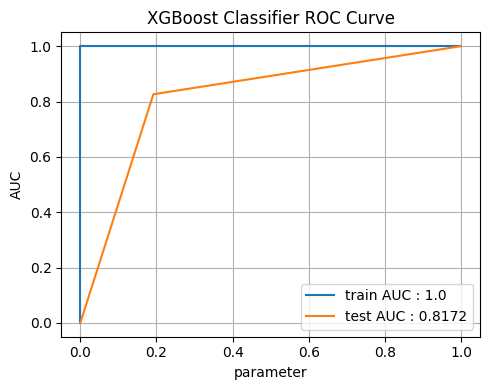

In [53]:
roc_results = get_roc_curve('XGBoost Classifier',
                             xgboost_model)

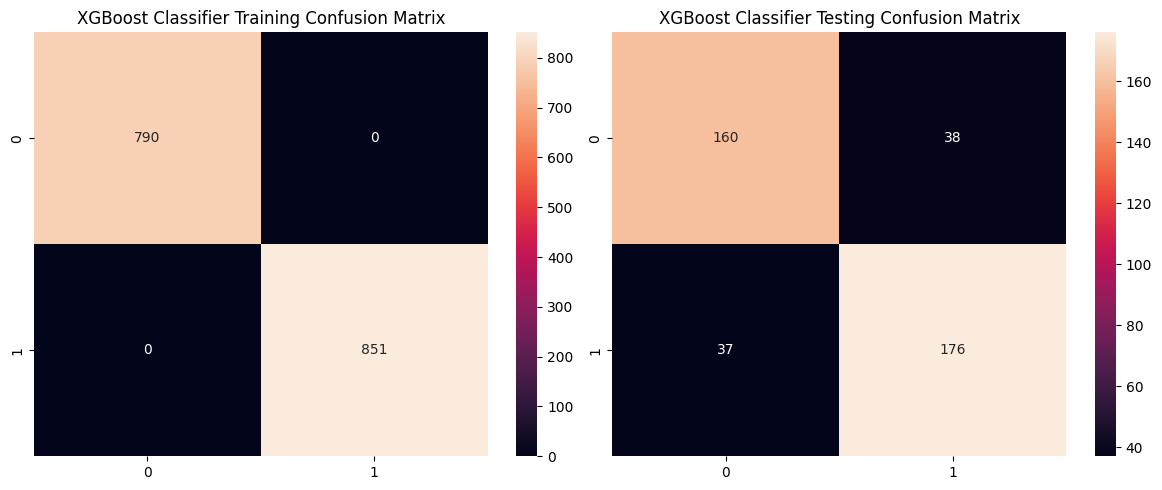

In [54]:
results = get_confusion_matrix('XGBoost Classifier',
                                roc_results)

In [55]:
metrics(results[0])

              precision    recall  f1-score   support

           0     0.8122    0.8081    0.8101       198
           1     0.8224    0.8263    0.8244       213

    accuracy                         0.8175       411
   macro avg     0.8173    0.8172    0.8172       411
weighted avg     0.8175    0.8175    0.8175       411

confusion matrix:  [0.80808081 0.82629108]
Accuracy: 0.8175182481751825
Recall:  0.8171859439465073
Precision:  0.8173063238294036
F1: 0.8172412770877182


### SVM

In [60]:
svm_model = SVC()

parameters = { 'kernel' : ['poly', 'rbf', 'sigmoid'],
               'max_iter' : [20, 50, 100]
 }

cross_validation = 3
scoring_metric = "f1"
svm_model_cv = GridSearchCV(svm_model, 
                            parameters,
                            cv = cross_validation,
                            scoring = scoring_metric,
                            return_train_score=True)

svm_model_cv.fit(X_train, y_train)
print('Best Params ', svm_model_cv.best_params_)

Best Params  {'kernel': 'poly', 'max_iter': 100}


In [61]:
parameters = {
         'kernel' : 'poly',
         'max_iter' : 100,
        }

svm_model = SVC(kernel = parameters['kernel'],
max_iter = parameters['max_iter'], probability = True)

svm_model.fit(X_train, y_train)
Ypredtest = svm_model.predict_proba(X_test)[:,1]

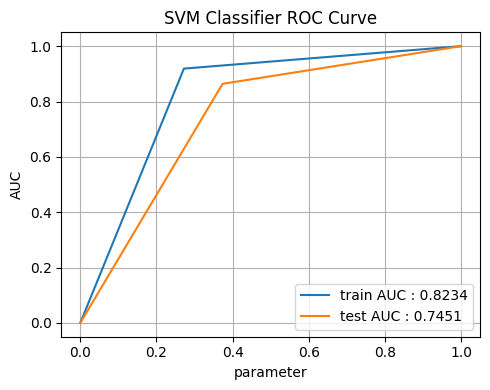

In [65]:
roc_results = get_roc_curve('SVM Classifier',
                             svm_model)

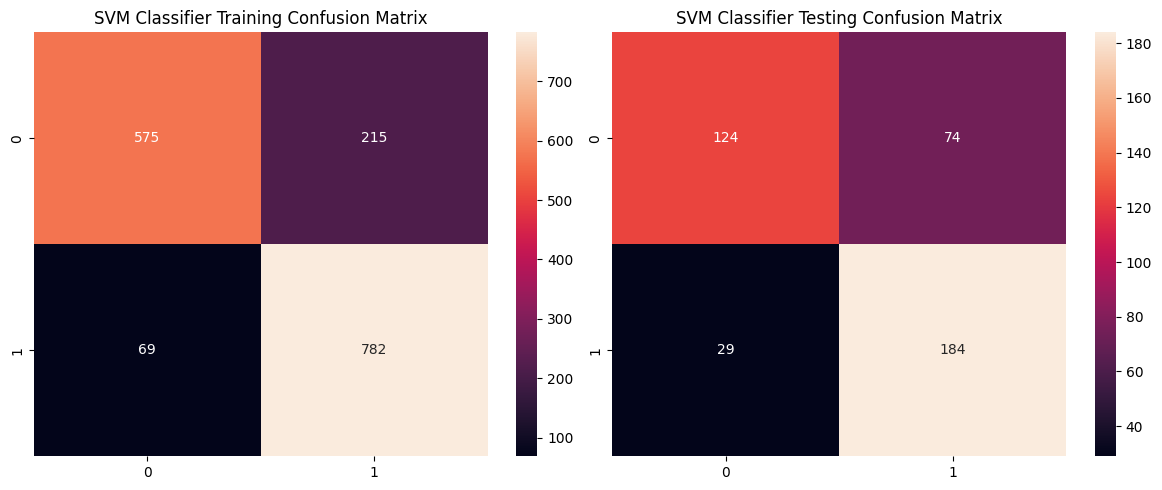

In [66]:
results = get_confusion_matrix('SVM Classifier',
                                roc_results)

In [67]:
metrics(results[0])

              precision    recall  f1-score   support

           0     0.8105    0.6263    0.7066       198
           1     0.7132    0.8638    0.7813       213

    accuracy                         0.7494       411
   macro avg     0.7618    0.7451    0.7439       411
weighted avg     0.7600    0.7494    0.7453       411

confusion matrix:  [0.62626263 0.86384977]
Accuracy: 0.7493917274939172
Recall:  0.7450561957604211
Precision:  0.7618179054567564
F1: 0.7439345273740179


### Naive Bayes

In [70]:
bnb_model = BernoulliNB()
bnb_model.fit(X_train, y_train)
Ypredtest = bnb_model.predict_proba(X_test)[:,1]

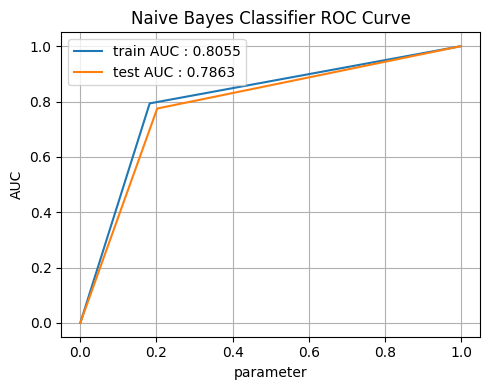

In [71]:
roc_results = get_roc_curve('Naive Bayes Classifier',
                             bnb_model)

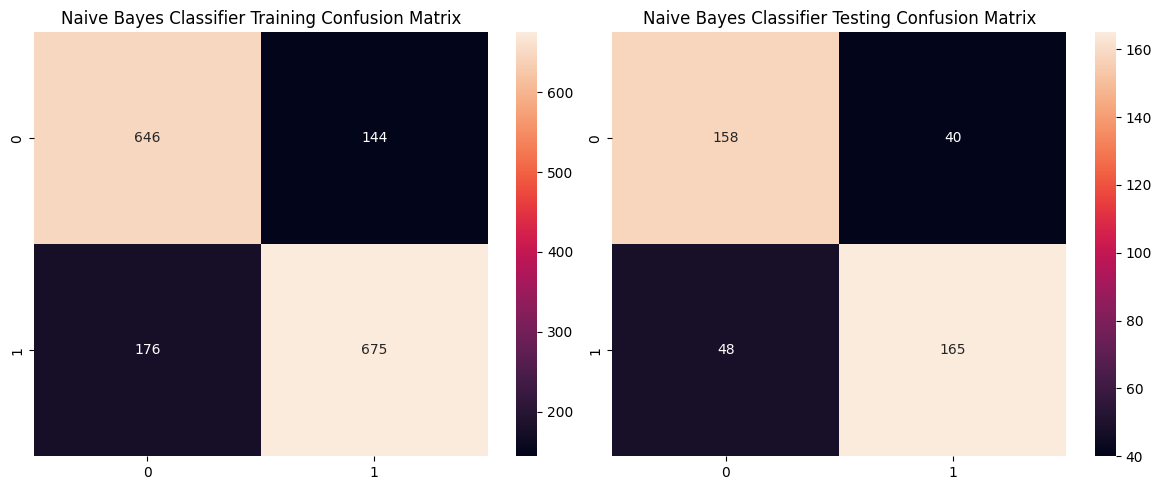

In [72]:
results = get_confusion_matrix('Naive Bayes Classifier',
                                roc_results)

In [73]:
metrics(results[0])

              precision    recall  f1-score   support

           0     0.7670    0.7980    0.7822       198
           1     0.8049    0.7746    0.7895       213

    accuracy                         0.7859       411
   macro avg     0.7859    0.7863    0.7858       411
weighted avg     0.7866    0.7859    0.7860       411

confusion matrix:  [0.7979798  0.77464789]
Accuracy: 0.7858880778588808
Recall:  0.7863138426518708
Precision:  0.7859341700213118
F1: 0.7858259510161542


In [76]:
import tabulate
print('Task P2 : Open AI Embeddings - Model text-embedding-ada-002')
conclusion = [['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Train AUC', 'Test AUC', ],
             ['Logistic Regression', 85.4, 85.6, 85.2, 85.3, 0.93, 0.85],
             ['Random Forest Classifier', 81.0, 81.3, 80.8, 80.8, 1, 80.8],
             ['XGBoost Classifier',  81.7, 85.6, 85.2, 85.3, 0.93, 0.85],
              ['Naive Bayes Classifier',  78.5, 78.5, 78.6, 78.5, 0.80, 0.78],
              ['SVM Classifier',  74.9, 76.1, 74.5, 74.3, 0.82, 0.74],
             ]
print(tabulate.tabulate(conclusion, tablefmt='fancy_grid'))

Task P2 : Open AI Embeddings - Model text-embedding-ada-002
╒══════════════════════════╤══════════╤═══════════╤════════╤══════════╤═══════════╤══════════╕
│ Model                    │ Accuracy │ Precision │ Recall │ F1 Score │ Train AUC │ Test AUC │
├──────────────────────────┼──────────┼───────────┼────────┼──────────┼───────────┼──────────┤
│ Logistic Regression      │ 85.4     │ 85.6      │ 85.2   │ 85.3     │ 0.93      │ 0.85     │
├──────────────────────────┼──────────┼───────────┼────────┼──────────┼───────────┼──────────┤
│ Random Forest Classifier │ 81.0     │ 81.3      │ 80.8   │ 80.8     │ 1         │ 80.8     │
├──────────────────────────┼──────────┼───────────┼────────┼──────────┼───────────┼──────────┤
│ XGBoost Classifier       │ 81.7     │ 85.6      │ 85.2   │ 85.3     │ 0.93      │ 0.85     │
├──────────────────────────┼──────────┼───────────┼────────┼──────────┼───────────┼──────────┤
│ Naive Bayes Classifier   │ 78.5     │ 78.5      │ 78.6   │ 78.5     │ 0.8       │ 0